In [3]:
import pickle
import numpy as np

with open('X.pickle', 'rb') as pickle_in:
    X = pickle.load(pickle_in)
with open('y.pickle', 'rb') as pickle_in:
    y = pickle.load(pickle_in)
X = X / 255

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.nn import relu, softmax

model = Sequential()

model.add(Conv2D(64, (3, 3), activation=relu))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation=relu))
model.add(MaxPooling2D((2, 2)))
          
model.add(Flatten())

model.add(Dense(128, input_shape=X.shape[1:], activation=relu))
model.add(Dense(2, activation=softmax))

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X, y, epochs=5, validation_split=0.1)

Epoch 1/5
702/702 [==============================] - 160s 226ms/step - loss: 0.6466 - accuracy: 0.6295 - val_loss: 0.5469 - val_accuracy: 0.7246
Epoch 2/5
702/702 [==============================] - 144s 206ms/step - loss: 0.4996 - accuracy: 0.7571 - val_loss: 0.4901 - val_accuracy: 0.7595
Epoch 3/5
702/702 [==============================] - 148s 211ms/step - loss: 0.4001 - accuracy: 0.8191 - val_loss: 0.4599 - val_accuracy: 0.7900
Epoch 4/5
702/702 [==============================] - 152s 217ms/step - loss: 0.2923 - accuracy: 0.8728 - val_loss: 0.4937 - val_accuracy: 0.7788
Epoch 5/5
702/702 [==============================] - 151s 215ms/step - loss: 0.1681 - accuracy: 0.9328 - val_loss: 0.6116 - val_accuracy: 0.7876


In [87]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

390/390 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.4980
0.6931487917900085 0.4980357587337494


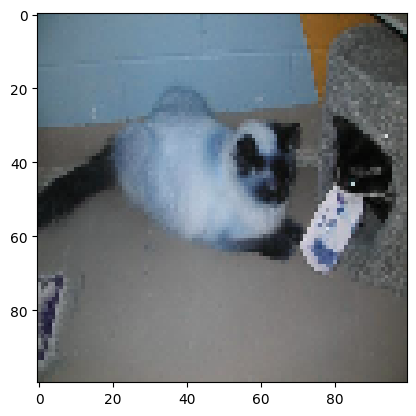

In [6]:
import matplotlib.pyplot as plt

plt.imshow(X[0], cmap=plt.cm.binary)
plt.show()

In [7]:
predictions = model.predict([X])

780/780 [==============================] - 34s 43ms/step


In [11]:
model.save('saved_model/saved_model')

INFO:tensorflow:Assets written to: saved_model/saved_model\assets


INFO:tensorflow:Assets written to: saved_model/saved_model\assets
